In [ ]:
# Implement map
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd
import numpy as np
from scipy import spatial
import pandas as pd
from sko.ACA import ACA_TSP
from sko.GA import GA_TSP
import time
from math import radians, cos, sin, asin, sqrt

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

long =[-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]
lat = [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538]
geometry = [Point(xy) for xy in zip(long,lat)]

shape_file = "boundary.shp"
ward = gpd.read_file(shape_file, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry, crs = 4326)

# Plot boundary
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1, aspect='equal')
# ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# Plot buildings
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red') #, marker = '*') 
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

In [59]:
# Implement Ant into map
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
from sko.GA import GA_TSP
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np
from scipy import spatial
import time
from math import radians, cos, sin, asin, sqrt
num_points = 51
long =[-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]
lat = [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538]
# building_name = ['University of Tennessee Student Union','Ayres Hall','Min Kao Building - Department of Electrical Engineering & Computer Science','Child and Family Studies','James D. Hoskins Library','Department of Microbiology','Ken and Blaire Mossman Building','University of Tennessee College of Law','Center for Global Engagement','Frieson Black Cultural Center','Temple Hall','University of Tennessee - Office of Equity and Diversity','Center for Global Engagement','Torchbearer Statue University of Tennessee','McClung Museum of Natural History & Culture','TRECS','Center for Global Engagement','John C. Hodges Library','Tickle College of Engineering','Dougherty Engineering Building - Department of Mechanical Aerospace and Biomedical Engineering','College of Architecture and Design','Natalie L. Haslam Music Center','St. John XXIII','Humanities and Social Sciences Building','McClung Tower','Haslam College of Business','Neyland Garage','11th St Parking Garage','Alumni Memorial Building','Carrick Hall North and South','College of Nursing','Dabney-Buehler Hall','Dogwood Hall','Ferris Hall','Frank G. Clement Hall','Fred D. Brown Hall','Geier Hall','Greve Hall','Hess Hall','Howard H. Baker Jr. Center for Public Policy','Laurel Hall','Magnolia Hall','Massey Hall','Perkins Hall','Reese Hall','Robinson Hall','Rocky Top Dining Hall','Science and Engineering Research Facility','Stokely Hall','Volunteer Hall','Strong Hall']
# print(pd.DataFrame(building_name, columns = ["Location"]))
# code-runner.runInTerminal == True
    
print("Select Number of Buildings (2 - 51) : ")
num_points = input("")
print(num_points)
num_points = int(num_points)

num_points_copy = num_points
building_array = []
while (num_points_copy != 0):
    print("Select Buildings (0 - 50) : ")
    input_value = int(input(""))
    if input_value < 0 or input_value > 50 :
        print(input_value, "is not valid input.")
    else:
        print(input_value)
        building_array.append(input_value)
        num_points_copy -= 1
# print(building_array)

Select Number of Buildings (2 - 51) : 
9
Select Buildings (0 - 50) : 
0
Select Buildings (0 - 50) : 
4
Select Buildings (0 - 50) : 
7
Select Buildings (0 - 50) : 
9
Select Buildings (0 - 50) : 
3
Select Buildings (0 - 50) : 
5
Select Buildings (0 - 50) : 
6
Select Buildings (0 - 50) : 
1
Select Buildings (0 - 50) : 
2


[0 2 1 6 5 4 8 7 3 0]


c:\Users\shid0\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


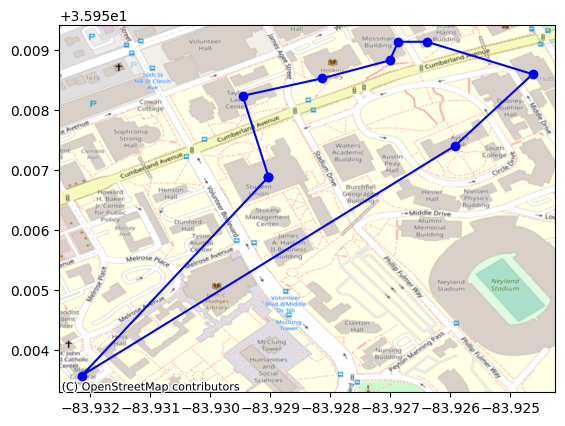

In [114]:
# # Implement Ant into map

def distance(lat1, long1, lat2, long2):
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    r = 3956
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
    dist = 2 * r * asin(sqrt(h))
    return dist
new_lat = [lat[i] for i in building_array]
new_long = [long[i] for i in building_array]
new_long = np.array(new_long)
new_lat = np.array(new_lat)
data = {'lat': [lat[i] for i in building_array], 'long': [long[i] for i in building_array]}
df = pd.DataFrame(data)
distance_matrix = pd.DataFrame(index=df.index, columns=df.index)
arr_test = []
dist_arr = []
for i in range(len(df)):
    for j in range(len(df)):
        distance_matrix.iloc[i,j] = distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j])
        arr_test.append(distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j]))
    dist_arr.append(arr_test.copy())
    arr_test =[]
distance_matrix = dist_arr
distance_matrix = np.array(distance_matrix)
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])
def distance(lat1, long1, lat2, long2):
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    r = 3956
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
    dist = 2 * r * asin(sqrt(h))
    return dist
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=num_points, max_iter=10,
                  distance_matrix=distance_matrix)
best_x, best_y = aca.run()
best_points_ = np.concatenate([best_x, [best_x[0]]])

###
# best_points_ = np.concatenate([best_x, [best_x[0]]])
# best_points_coordinate = points_coordinate[best_points_, :]
# for index in range(0, len(best_points_)):
#     ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
# ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
###

geometry = [Point(xy) for xy in zip(new_long,new_lat)]
best_geometry = [geometry[i] for i in best_points_]
best_geometry_array = np.array([(point.x, point.y) for point in best_geometry])
print(best_points_)
shape_file = "boundary.shp"
ward = gpd.read_file(shape_file, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry, crs = 4326)

ax = ward.plot(alpha=0.35, color='#d66058', zorder=1, aspect='equal')
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red') #, marker = '*') 
ax.plot(best_geometry_array[:, 0], best_geometry_array[:, 1], 'o-b')

for index in range(0, num_points-1):
    # print(index)
    ax.annotate(best_geometry_array[index, 1], (best_geometry_array[index, 0], building_array[index]), fontsize=100,  zorder=100)  # NOT WORKING...

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

# pd.DataFrame(aca.y_best_history).cummin().plot()
# plt.show()

In [ ]:
# # Calculates distance between two coordinates
# def distance(lat1, long1, lat2, long2):
     
#     # Converts decimal degrees to radians
#     long1 = radians(long1)
#     long2 = radians(long2)
#     lat1 = radians(lat1)
#     lat2 = radians(lat2)

#     # Radius of earth in miles
#     r = 3956
      
#     # Haversine formula
#     h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
 
#     dist = 2 * r * asin(sqrt(h))

#     return dist
    
# data = {'lat': [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538],
#         'long': [-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]}

# df = pd.DataFrame(data)

# distance_matrix = pd.DataFrame(index=df.index, columns=df.index)

# for i in range(len(df)):
#     for j in range(len(df)):
#         distance_matrix.iloc[i,j] = distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j])

# # print(distance_matrix)